<h1><center>Exploring Star Clusters</center></h1>

All of you would have, by now, a (hopefully) good understanding of python and stellar evolution. Now, let's have some fun and explore some data sets
The data has been taken from the [HST UV Globular Cluster Survey (HUGS)](https://archive.stsci.edu/prepds/hugs/#dataaccess), from the [Mikulski Archive for Space Telescopes (MAST)](https://archive.stsci.edu/index.html)

Thanks to Pavan Hebbar and Chinmay Talegaonkar for inspiration for this module

It is of a famous globular cluster called M13 in Hercules.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data=np.loadtxt('dataset.txt',usecols=(2,3,8,9,14,15,20,21,26,27,32,33,34),dtype='float',comments='#')

In [26]:
data.shape

(174767, 13)

So, we have data on 174,767 stars.
The column on membership probability looks interesting. Let's dig deeper.

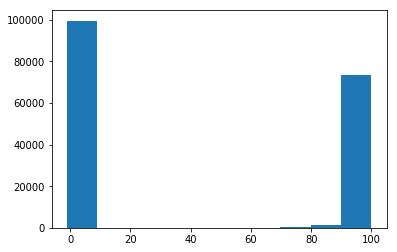

In [27]:
plt.hist(data[:,-3]);

It seems as though almost 100,000 stars in the field of view have almost 0 probability of belonging to the cluster. Let us remove them from the data.

In [28]:
data=data[data[:,-3]>=90]

In [29]:
data.shape

(73388, 13)

And like that, we now have 73,388 stars. For fun, let's plot the membership probability of the rest of the stars.

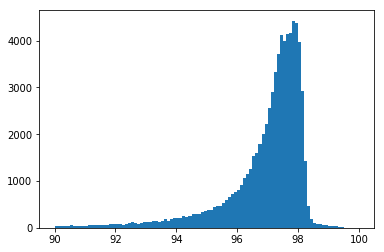

In [30]:
plt.hist(data[:,-3],bins=100);

As many of you may have seen, the magnitudes in the dataset had absurd values like -99 and so on. Now we must deal with problems in the magnitude data. Plot histograms to see how many of these stars are there in each band.

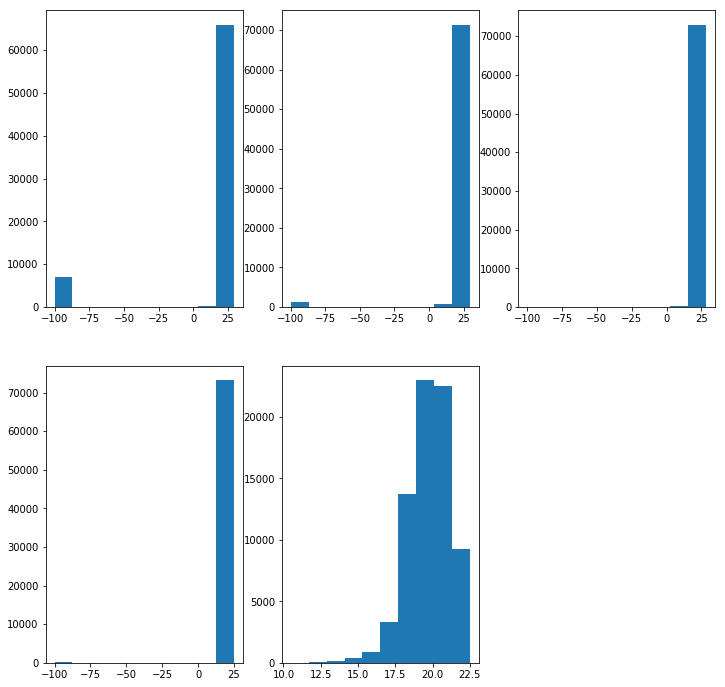

In [31]:
plt.figure(figsize=(12,12))
plt.subplot(231)
plt.hist(data[:,0]);
plt.subplot(232)
plt.hist(data[:,2]);
plt.subplot(233)
plt.hist(data[:,4]);
plt.subplot(234)
plt.hist(data[:,6]);
plt.subplot(235)
plt.hist(data[:,8]);

There are a few sources which are saturated and show magnitude as -99. These must first be removed. So let's do that

In [32]:
ind=np.where(data[:,0:10]<=-99)
unsat_data=np.delete(data,ind,axis=0)

In [33]:
unsat_data.shape

(65065, 13)

It is possible that at lower magnitudes, the photometric RMS of the source could be high, i.e. the photometry is not precise, since the noise itself would be almost indistinguishable from the signal. Let's see how that varies

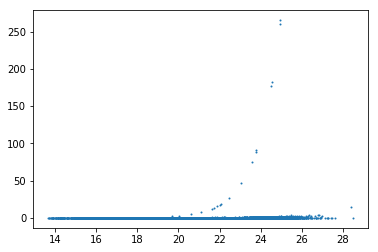

In [34]:
i=4 # Vary i for each band, 0,2,4,6,8 and see how the RMS varies with the magnitude
plt.scatter(unsat_data[:,i],unsat_data[:,i+1],s=1);

So, now we must account for this uncertainty by limiting the data we use. Play around a bit with a limiting magnitude, until you get a good enough limit on the RMS.

In [35]:
ind_=np.where(unsat_data[:,6]>20.5)

In [36]:
clean_data=np.array(np.delete(unsat_data,ind_,axis=0))

In [37]:
clean_data.shape

(35548, 13)

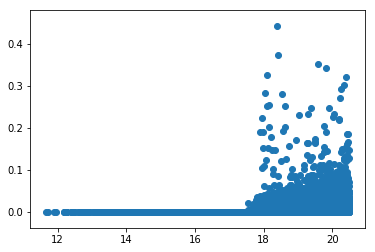

In [38]:
i=6# Vary i for each band, 0,2,4,6,8 and see how the RMS varies with the magnitude
plt.scatter(clean_data[:,i],clean_data[:,i+1]);

Now, for ease of plotting, let's unpack the different bands, and name them according to the [WFC3 Filters](http://www.stsci.edu/itt/APT_help/WFC3_Cycle21/c06_uvis06.html#371242) of the Hubble Space Telescope

In [39]:
uv,u,b,v,i=clean_data[:,0:10:2].transpose()

And now, the showdown. We can finally plot a colour-magnitude diagram of the globular cluster.

(20.5, 10)

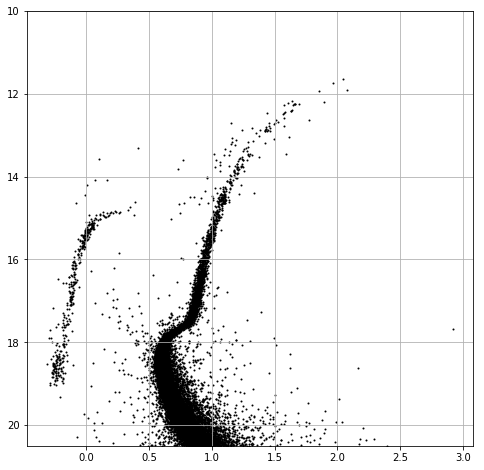

In [40]:
plt.figure(figsize=(8,8))
plt.grid()
plt.scatter(b-v,v,s=1,color='k')
plt.ylim(20.5,10)         # Just to reverse the axis

Study the color magnitude diagram carefully. What branches can you clearly make out. What could the stars beyond the main sequence be? 

Take a bit of time, and plot more of these diagrams, changing the bands used to calculate the colour. See how the diagram changes

We can also plot a color-color diagram to see where the main sequence lies with respect to other stages.

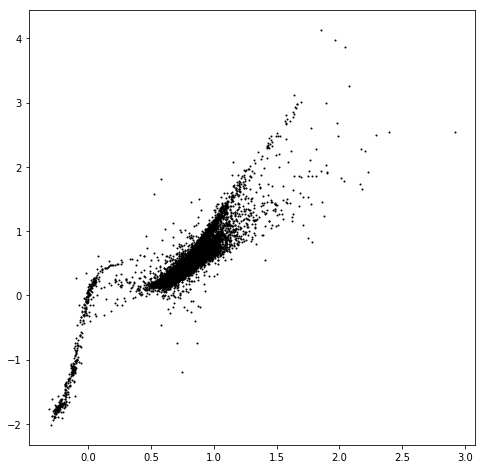

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(b-v,u-v,s=1,color='k')

Given that we know the magnitudes and RA-dec of the stars, we can attempt to reconstruct the image of the globular cluster.

In [42]:
ra,dec=clean_data[:,-2:].transpose()

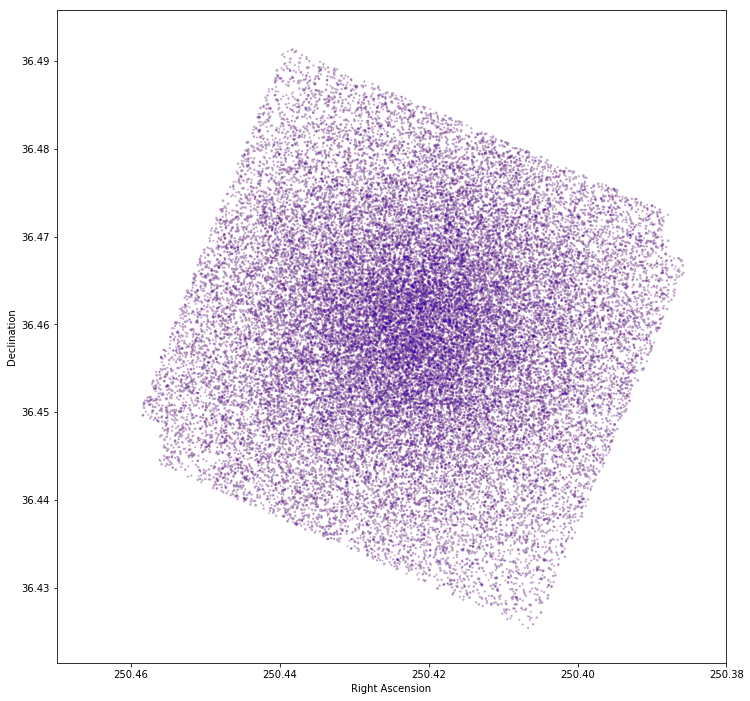

In [101]:
plt.figure(figsize=(12,12))
plt.scatter(ra,dec,s=-(v-v.max()),color='g',alpha=0.1)
plt.scatter(ra,dec,s=-(i-i.max()),color='r',alpha=0.1)
plt.scatter(ra,dec,s=-(b-b.max()),color='b',alpha=0.1)
plt.xlim(250.47,250.38)
plt.xlabel('Right Ascension')
plt.ylabel('Declination');

Now, that we are more familiar with the how a colour magnitude diagram works, let's try to estimate the age of the cluster. We will need a few assumptions to go about this task.

We need to eventually relate the **Luminosity** to the **time spent in Main Sequence**. Can we come up with such a relation? 

Let the Luminosity at the turn off point be $L_{TO}$. We can relate $L_{TO}$ to $L_\odot$ if we know the absolute magnitude of the sun(which we do) and the absolute magnitude of the star(which we don't directly). But, if we know the distance to the star cluster, then knowing the apparent magnitude is equivalent to knowing the absolute mamgnitude. So what is the apparent magnitude of a star at the Turn Off point?

We go to the HR Diagram

Here we asssume that Luminosity $L$ is proportional to $M^{3.5}$, then we have 
\begin{align}
    \frac{L}{L_\odot}=\left(\frac{M}{M_\odot}\right)^{3.5}
\end{align}
We further assume that the time spent by the star in the main sequence is proportional the its mass by luminosity.
\begin{align}
    \frac{T}{T_\odot}=\frac{M/L}{{M_\odot}/{L_\odot}}=\left(\frac{L}{L_\odot}\right)^{\frac{1}{3.5}-1}=\left(\frac{L}{L_\odot}\right)^{-0.71}
\end{align}
where $T_\odot$ is the time spent by the sun in the main sequence, and $T$ is the age of the cluster


In [82]:
m=18
M=m-5*np.log10(680)
ratio=10**((M-4.66)/(5))

In [102]:
time=ratio**(0.71)

In [103]:
time

0.7641852871711986

We get an age of around 7.6 Gyr, which is close to the currently accepted value for the distance to the cluster